In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [239]:
## Reading and saving the data to df variable dataframe type
df = pd.read_excel(r'C:\Users\Tonix\Desktop\Python Learning\RyanMatt_Python\Cricket_Data.xlsx', skiprows=1)

In [240]:
## Checking for dataframe infos like how many are non-null values, data type, index and column names, total rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  70 non-null     object 
 1   Span    70 non-null     object 
 2   Mat     70 non-null     int64  
 3   Inns    70 non-null     int64  
 4   NO      70 non-null     int64  
 5   Runs    70 non-null     int64  
 6   HS      70 non-null     object 
 7   Ave     70 non-null     float64
 8   BF      70 non-null     object 
 9   SR      70 non-null     float64
 10  100     70 non-null     int64  
 11  50      70 non-null     int64  
 12  0       70 non-null     int64  
 13  4s      70 non-null     object 
 14  6s      70 non-null     object 
dtypes: float64(2), int64(7), object(6)
memory usage: 8.3+ KB


In [241]:
df.isnull().any()

Player    False
Span      False
Mat       False
Inns      False
NO        False
Runs      False
HS        False
Ave       False
BF        False
SR        False
100       False
50        False
0         False
4s        False
6s        False
dtype: bool

In [242]:
## Checking for unusual or uncommon values
df[df['BF'].str.contains('-')==1]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
9,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,-,0.0,15,19,6,258+,2
15,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,-,0.0,15,14,1,107+,11
60,Hon.FS Jackson (ENG),1893-1905,20,33,4,1415,144*,48.79,-,0.0,5,6,3,51+,0


In [243]:
## Replacing the uncommon values to NaN and assigning it to new dataframe name df_clean
df_clean = df.replace('-', np.nan)
df_clean[df_clean['Player'].isin(['ED Weekes (WI)', 'CL Walcott (WI)', 'Hon.FS Jackson (ENG)'])]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
9,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,NaN,0.0,15,19,6,258+,2
15,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,NaN,0.0,15,14,1,107+,11
60,Hon.FS Jackson (ENG),1893-1905,20,33,4,1415,144*,48.79,NaN,0.0,5,6,3,51+,0


In [244]:
df_clean.isnull().any()

Player    False
Span      False
Mat       False
Inns      False
NO        False
Runs      False
HS        False
Ave       False
BF         True
SR        False
100       False
50        False
0         False
4s        False
6s        False
dtype: bool

In [382]:
## Replace NaN values to 0
df_clean['Balls_Faced'] = df_clean['Balls_Faced'].fillna(0)


0    False
1    False
2    False
3    False
4    False
Name: Balls_Faced, dtype: bool

In [245]:
df_clean[df_clean['BF'].str.contains('-')==True]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s


In [246]:
## Renaming columns using a list for clarity and readibility
df_clean.rename(columns={'Mat' : 'Matches', 'NO' : 'Not_Outs', 'HS' : 'Highest_Inning_Score', 'BF' : 'Balls_Faced', 'SR' : 'Batting_Strike_Rate'}, inplace=True)
df_clean.head()

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inning_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6
1,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
2,Saud Shakeel (PAK),2022-2024,11,21,3,1108,208*,61.55,2375,46.65,3,6,1,121,1
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1


In [247]:
## Checking and showing duplicated and their duplicate values

#df_clean[df_clean.duplicated()==1]
df_clean[df_clean['Player'].duplicated()==1]['Player'].to_list()

['H Sutcliffe (ENG)',
 'GE Tyldesley (ENG)',
 'KS Williamson (NZ)',
 'Inzamam-ul-Haq (ICC/PAK)',
 'M Labuschagne (AUS)',
 'GC Smith (ICC/SA)',
 'WH Ponsford (AUS)']

In [248]:
df_clean[df_clean['Player'].isin(df_clean[df_clean['Player'].duplicated()==1]['Player'].to_list())].sort_values('Player', ascending=False)

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inning_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s
65,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119+,0
69,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119+,0
49,M Labuschagne (AUS),2018-2024,50,90,7,4114,215,49.56,7809,52.68,11,20,4,463,12
56,M Labuschagne (AUS),2018-2024,50,90,7,4114,215,49.56,7809,52.68,11,20,4,463,12
20,KS Williamson (NZ),2010-2024,100,176,17,8743,251,54.98,17006,51.41,32,34,11,971,24
32,KS Williamson (NZ),2010-2024,100,176,17,8743,251,54.98,17006,51.41,32,34,11,971,24
48,Inzamam-ul-Haq (ICC/PAK),1992-2007,120,200,22,8830,329,49.60,16345,54.02,25,46,15,1105,48
55,Inzamam-ul-Haq (ICC/PAK),1992-2007,120,200,22,8830,329,49.60,16345,54.02,25,46,15,1105,48
5,H Sutcliffe (ENG),1924-1935,54,84,9,4555,194,60.73,6558+,34.59,16,23,2,202+,6
16,H Sutcliffe (ENG),1924-1935,54,84,9,4555,194,60.73,6558+,34.59,16,23,2,202+,6


In [249]:
## Drop duplicate values
df_clean.drop_duplicates(inplace=True)

In [250]:
## Checking the duplicated values 
df_clean[df_clean['Player'].isin(['H Sutcliffe (ENG)', 'GE Tyldesley (ENG)', 'KS Williamson (NZ)', 'Inzamam-ul-Haq (ICC/PAK)', 'M Labuschagne (AUS)', 'GC Smith (ICC/SA)', 'WH Ponsford (AUS)'])]

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inning_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s
5,H Sutcliffe (ENG),1924-1935,54,84,9,4555,194,60.73,6558+,34.59,16,23,2,202+,6
19,GE Tyldesley (ENG),1921-1929,14,20,2,990,122,55.00,178+,29.21,3,6,2,37+,2
20,KS Williamson (NZ),2010-2024,100,176,17,8743,251,54.98,17006,51.41,32,34,11,971,24
48,Inzamam-ul-Haq (ICC/PAK),1992-2007,120,200,22,8830,329,49.60,16345,54.02,25,46,15,1105,48
49,M Labuschagne (AUS),2018-2024,50,90,7,4114,215,49.56,7809,52.68,11,20,4,463,12
64,GC Smith (ICC/SA),2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24
65,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119+,0


In [251]:
## Splitting string (Span column) to create new columns Rookie year and Final year

## Rookie year
df_clean['Rookie_Year'] = df_clean['Span'].str[:4] 
# alternative approach
#df_clean['Span'].str.split('-').str[0]
df_clean.head()

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inning_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Rookie_Year
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928
1,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015
2,Saud Shakeel (PAK),2022-2024,11,21,3,1108,208*,61.55,2375,46.65,3,6,1,121,1,2022
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930


In [252]:
## Final Year
#df_clean['Span'].str[5:9]
# alternative approach
df_clean['Final_Year'] = df_clean['Span'].str.split('-').str[1]
df_clean.head()

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inning_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Rookie_Year,Final_Year
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948
1,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016
2,Saud Shakeel (PAK),2022-2024,11,21,3,1108,208*,61.55,2375,46.65,3,6,1,121,1,2022,2024
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930,1954


In [253]:
## Checking string length on each element on column Span if there are more than 9 to see if the values on the column are consistent
df_clean['Span'][df_clean['Span'].apply(len) > 9].count()

0

In [254]:
#Dropping the Span column
df_clean.drop(columns='Span', inplace=True)

In [255]:
#Checking of Rookie_Year and Final_Year column

#df_clean[['Rookie_Year', 'Final_Year']]
#df_clean.loc[:, 'Rookie_Year':'Final_Year']
df_clean.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inning_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Rookie_Year,Final_Year
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948
1,AC Voges (AUS),20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016
2,Saud Shakeel (PAK),11,21,3,1108,208*,61.55,2375,46.65,3,6,1,121,1,2022,2024
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970
4,GA Headley (WI),22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930,1954


In [256]:
## Splitting the Country from the Player column

#df_clean_country_list = df_clean['Player'].str.extract(r'\((.*?)\)')
df_clean['Country'] = df_clean['Player'].str.extract(r'\((.*?)\)')

In [257]:
#df_clean_country_list.values.flatten().tolist()
#df_clean_country_list.values.flatten()
df_clean['Player'].str.extract(r'\((.*?)\)').values.flatten()

array(['AUS', 'AUS', 'PAK', 'SA', 'WI', 'ENG', 'ENG', 'ENG', 'ENG', 'WI',
       'ENG', 'WI', 'SL', 'AUS', 'ENG', 'WI', 'ENG', 'ICC/SA', 'ENG',
       'NZ', 'WI', 'IND', 'AUS', 'SA', 'IND', 'ICC/WI', 'PAK', 'ICC/IND',
       'PAK', 'PAK', 'AUS', 'AUS', 'ZIM', 'AUS', 'WI', 'IND', 'AUS',
       'AUS', 'SA', 'AUS', 'ENG', 'NZ', 'WI', 'ENG', 'SL', 'ICC/PAK',
       'AUS', 'WI', 'ENG', 'ICC/IND', 'PAK', 'IND', 'AUS', 'SA', 'SA',
       'ENG', 'SL', 'AUS', 'AUS', 'ICC/SA', 'AUS', 'AUS', 'ENG'],
      dtype=object)

In [258]:
df_clean['Player'].str.extract(r'(\(.*?\))').values.flatten()

array(['(AUS)', '(AUS)', '(PAK)', '(SA)', '(WI)', '(ENG)', '(ENG)',
       '(ENG)', '(ENG)', '(WI)', '(ENG)', '(WI)', '(SL)', '(AUS)',
       '(ENG)', '(WI)', '(ENG)', '(ICC/SA)', '(ENG)', '(NZ)', '(WI)',
       '(IND)', '(AUS)', '(SA)', '(IND)', '(ICC/WI)', '(PAK)',
       '(ICC/IND)', '(PAK)', '(PAK)', '(AUS)', '(AUS)', '(ZIM)', '(AUS)',
       '(WI)', '(IND)', '(AUS)', '(AUS)', '(SA)', '(AUS)', '(ENG)',
       '(NZ)', '(WI)', '(ENG)', '(SL)', '(ICC/PAK)', '(AUS)', '(WI)',
       '(ENG)', '(ICC/IND)', '(PAK)', '(IND)', '(AUS)', '(SA)', '(SA)',
       '(ENG)', '(SL)', '(AUS)', '(AUS)', '(ICC/SA)', '(AUS)', '(AUS)',
       '(ENG)'], dtype=object)

In [259]:
df_clean['Player'].str.split(r'(').str[0]

0       DG Bradman 
1         AC Voges 
2     Saud Shakeel 
3       RG Pollock 
4       GA Headley 
          ...      
63      KD Walters 
64        GC Smith 
65     WH Ponsford 
66       SJ McCabe 
67      DR Jardine 
Name: Player, Length: 63, dtype: object

In [324]:
## Remove the country in Player column
#df_clean['Player'] = df_clean['Player'].str.split(r'(').str[0]
df_clean.sample(10)

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inning_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Rookie_Year,Final_Year,Country
37,S Chanderpaul,164,280,49,11867,203,51.37,27395,43.31,30,66,15,1285,36,1994,2015,WI
2,Saud Shakeel,11,21,3,1108,208,61.55,2375,46.65,3,6,1,121,1,2022,2024,PAK
20,KS Williamson,100,176,17,8743,251,54.98,17006,51.41,32,34,11,971,24,2010,2024,NZ
41,AB de Villiers,114,191,18,8765,278,50.66,16077,54.51,22,46,8,1024,64,2004,2018,SA
48,Inzamam-ul-Haq,120,200,22,8830,329,49.60,16345,54.02,25,46,15,1105,48,1992,2007,ICC/PAK
66,SJ McCabe,39,62,5,2748,232,48.21,3217+,60.02,6,13,4,241+,5+,1930,1938,AUS
42,AR Border,156,265,44,11174,205,50.56,27002+,41.09,27,63,11,1161,28,1978,1994,AUS
13,SPD Smith,109,195,25,9685,239,56.97,18100,53.50,32,41,10,1063,54,2010,2024,AUS
28,R Dravid,164,286,32,13288,270,52.31,31258,42.51,36,63,8,1654,21,1996,2012,ICC/IND
10,WR Hammond,85,140,16,7249,336,58.45,7491+,38.07,22,24,4,419+,27,1927,1947,ENG


In [340]:
## Remove unnecessary character/string to convert from string to int type

# Column 'Highest_Inning_Score'
df_clean['Highest_Inning_Score'] = df_clean['Highest_Inning_Score'].str.split(r'*').str[0]

# Columns Balls_Faced
df_clean['Balls_Faced'] = df_clean['Balls_Faced'].str.split(r'+').str[0]

# Columns 4s and 6s
df_clean['4s'] = df_clean['4s'].str.split(r'+').str[0]
df_clean['6s'] = df_clean['6s'].str.split(r'+').str[0]

In [317]:
## Change of data type
df_clean['Highest_Inning_Score'] = df_clean['Highest_Inning_Score'].astype('int')

In [387]:
## Change of data type
df_clean = df_clean.astype({'Balls_Faced': 'int', '4s':'int', '6s':'int', 'Rookie_Year':'int', 'Final_Year':'int'})

In [391]:
## Add new column of Career_Length

df_clean['Career_Length'] = df_clean['Final_Year'] - df_clean['Rookie_Year']
df_clean

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inning_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Rookie_Year,Final_Year,Country,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,20
1,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,1
2,Saud Shakeel,11,21,3,1108,208,61.55,2375,46.65,3,6,1,121,1,2022,2024,PAK,2
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,7
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,KD Walters,74,125,14,5357,250,48.26,8662,49.16,15,33,4,525,23,1965,1981,AUS,16
64,GC Smith,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,2002,2014,ICC/SA,12
65,WH Ponsford,29,48,4,2122,266,48.22,3118,44.77,7,6,1,119,0,1924,1934,AUS,10
66,SJ McCabe,39,62,5,2748,232,48.21,3217,60.02,6,13,4,241,5,1930,1938,AUS,8


### Questions to Answer

In [392]:
# What is cricketers (player) average year career length
df_clean['Career_Length'].mean()

13.031746031746032

In [393]:
df_clean['Career_Length'].median()

14.0

In [423]:
# What is the average batting strike rate for players who played for more than 10 years
df_clean[df_clean['Career_Length'] > 10]['Batting_Strike_Rate'].mean()

47.95090909090909

In [447]:
# Who and How many players who played before 1960

# Using shape method
# df_clean[df_clean['Rookie_Year'] < 1960].shape[0]

#alternatively using len function
#len(df_clean[df_clean['Rookie_Year'] < 1960])

df_clean[df_clean['Rookie_Year'] < 1960]['Player'].count()

23

In [494]:
# Max highest inn score by country
df_clean.groupby('Country')['Highest_Inning_Score'].max().sort_values(ascending=False)

Country
ICC/WI     400
AUS        380
SL         374
WI         365
ENG        364
ICC/PAK    329
ICC/IND    319
PAK        313
SA         278
ICC/SA     277
IND        254
NZ         251
ZIM        232
Name: Highest_Inning_Score, dtype: int32

In [505]:
#df_clean.groupby('Country')['Highest_Inning_Score'].max().to_frame('Highest Inning Score').reset_index().sort_values('Highest Inning Score',ascending=False)

df_clean.groupby('Country')['Highest_Inning_Score'].max().to_frame('Highest Inning Score').sort_values('Highest Inning Score', ascending=False).reset_index()

,Country,Highest Inning Score
0,ICC/WI,400
1,AUS,380
2,SL,374
3,WI,365
4,ENG,364
5,ICC/PAK,329
6,ICC/IND,319
7,PAK,313
8,SA,278
9,ICC/SA,277


In [488]:
# Validation/Checking of top 1 / highest inning score
df_clean[df_clean['Country'] == 'PAK'][['Country', 'Highest_Inning_Score']].sort_values(by='Highest_Inning_Score', ascending=False).head(1)

,Country,Highest_Inning_Score
30,PAK,313


In [516]:
df_clean.groupby('Country')[[100,50,0]].mean().sort_values(by=[100], ascending=False)

,100,50,0
Country,,,
ICC/SA,36.000000,48.000000,13.500000
ICC/WI,34.000000,48.000000,17.000000
ICC/IND,29.500000,47.500000,12.000000
IND,29.500000,36.500000,10.750000
SL,28.666667,44.000000,12.333333
ICC/PAK,25.000000,46.000000,15.000000
AUS,20.625000,28.375000,8.562500
NZ,18.500000,22.000000,6.000000
PAK,17.600000,23.600000,7.800000


In [517]:
df_clean

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inning_Score,Ave,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Rookie_Year,Final_Year,Country,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,20
1,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,1
2,Saud Shakeel,11,21,3,1108,208,61.55,2375,46.65,3,6,1,121,1,2022,2024,PAK,2
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,7
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,KD Walters,74,125,14,5357,250,48.26,8662,49.16,15,33,4,525,23,1965,1981,AUS,16
64,GC Smith,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,2002,2014,ICC/SA,12
65,WH Ponsford,29,48,4,2122,266,48.22,3118,44.77,7,6,1,119,0,1924,1934,AUS,10
66,SJ McCabe,39,62,5,2748,232,48.21,3217,60.02,6,13,4,241,5,1930,1938,AUS,8


In [530]:
df_country_player = df_clean.groupby('Country')['Country'].value_counts().to_frame().sort_values('count', ascending=True).reset_index()

<Axes: ylabel='Country'>

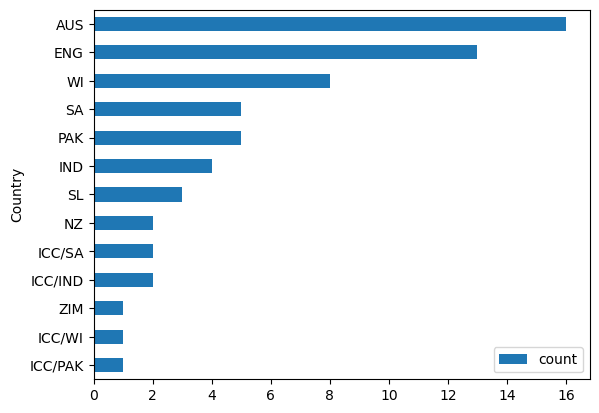

In [533]:
# plt.plot(df_country_player['Country'], df_country_player['count'])
df_country_player.plot(kind='barh', x='Country', y='count')

Text(0, 0.5, 'Number of Matches')

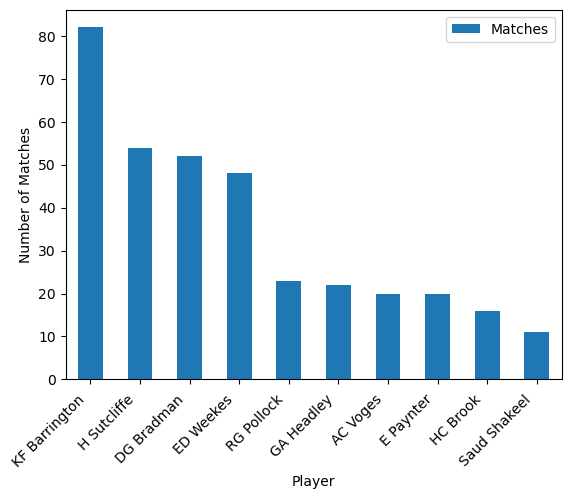

In [545]:
df_clean[['Player', 'Matches']].head(10).sort_values('Matches', ascending=False).set_index('Player').plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Matches')

In [547]:
# Save new cleaned dataframe to a csv file
df_clean.to_csv('Cricket_clean_data.csv', index=False)